<a href="https://www.kaggle.com/code/ajiboyetoluwalase/2017-new-york-hospital-discharge-eda?scriptVersionId=289581982" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **2017 New York Hospital Discharge**

we are using the Hospital Inpatient Discharges (SPARCS De-identified) 2017 [Data](http://www.health.ny.gov/statistics/sparcs).

#### **About the Data**
The data entails the De-indentified details of people who have been discharged from New york hospitals in the year 2017 the data is quite large with 2.34 million rows and 34 columns. it ia a mix of object, float and integers.

Something to note is that the Discharges that are identified as abortion will have some information redacted; PFI, Facility Name, Health Service Area, Hospital County, Operating Certificate, and all provider license numbers. Patient zip code is limited to the first three digits. However, in cases where the population size for the zip code is less than 20,000, if the cell size on patient classification strata are less than 10, or if the record is an abortion then the zip code is blank. The code “OOS” indicates Out of State zip codes. Patient age is presented in age groups: 0 to 17, 18 to 29, 30 to 49, 50 to 69, and 70 or Older. For years beginning with 2011, the variable indicating the type of insurance expected to pay the discharge has changed. Originally it was the Source of Payment. Effective December 2015, it is now the Payment Typology




#### **My Goal**
my goal is to do a patial Exploratory Data Analysis of the data and to figure out some points that can help in my primary task of creating a model that can predict the Length of stay of patients in the new york hospital Area.

##### **How i do this**
- The pipeline that i am trying is Ask a question and then Answer the question through visulalization
 

## 1. Importing Libraries and Data  

I imported the Essential Libraries and the data using pandas you will notice that i set the low_memory to False  thsi is beacasuse the data is quite large so pandas loads the data into the memory in chunks which then causes conflicting Dtype to occur(ie pandas loads in a chunk of a column where most of the data is in string then the next chunk is in integer this causes conflicts with low_memory = False the pandas loads all the data into memory first). 

In [1]:
#Importing Essential libraries 

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
import textwrap

In [2]:
# importing the data 
df = pd.read_csv("/kaggle/input/dny2017/DNY2017.csv", low_memory = False)

print(f"The shape of the data is {df.shape[0]} rows and {df.shape[1]}columns ")
print("A Peek in to the first 5 rows of the data")
df.head()

The shape of the data is 2343569 rows and 34columns 
A Peek in to the first 5 rows of the data


,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,30 to 49,NaN,M,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Medicare,Self-Pay,NaN,N,N,114168.00,40464.04
1,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,50 to 69,105,M,White,Spanish/Hispanic,...,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,58517.00,26046.50
2,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,30 to 49,105,F,White,Unknown,...,Moderate,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,N,39647.04,17397.59
3,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,50 to 69,105,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,36031.09,16118.84
4,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,18 to 29,105,F,White,Spanish/Hispanic,...,Minor,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,N,30534.00,11921.05


In [3]:
# Lets Get an Overview of the data 

print(f"The Data has {df.shape[0]} Rows and {df.shape[1]} Columns")
df.info()

The Data has 2343569 Rows and 34 Columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343569 entries, 0 to 2343568
Data columns (total 34 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCS Diagnosis Code                   int6

In [4]:
# Using Describe to check the statistics of the data 
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Hospital Service Area,2338414,8,New York City,1070546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospital County,2338414,57,Manhattan,395717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Operating Certificate Number,2338414.0,NaN,NaN,NaN,4985785.847224,2263243.60216,101000.0,2951001.0,5904001.0,7002017.0,7004010.0
Permanent Facility Id,2338414.0,NaN,NaN,NaN,1038.981138,720.228096,1.0,541.0,1097.0,1453.0,9431.0
Facility Name,2343569,211,Mount Sinai Hospital,52335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age Group,2343569,5,70 or Older,664780,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip Code - 3 digits,2304550,50,112,293867,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,2343569,3,F,1296954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,2343569,4,White,1317040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ethnicity,2343569,4,Not Span/Hispanic,1895664,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking the missing values 

In [5]:
# the .mul function means multiply by 100
missing_vals = (
    df.isna()
      .mean()
      .mul(100)
      .sort_values(ascending=False)
)

missing_vals.head(9)


Birth Weight                    90.276198
Payment Typology 3              74.128135
Payment Typology 2              37.495034
Zip Code - 3 digits              1.664939
Hospital County                  0.219964
Hospital Service Area            0.219964
Permanent Facility Id            0.219964
Operating Certificate Number     0.219964
APR Risk of Mortality            0.010241
dtype: float64

## 2.Column Description 
A simple description of all 34 columns in the data.

-  Hospital Service Area: zone of service of the hospital 
-  Hospital County: Country of Operation of the hospital 
-   Operating Certificate Number: Operating Certificate number of the patient
-  Permanent Facility Id: facility Id of the patient
-  Facility Name: Name of the Facility (Hospital Name )
-  Age Group: Age group of the patient
-   Zip Code - 3 digits: Zip code of the Hospital  
- Gender: Gender of the patient
-  Race: Race of the patient 
-   Ethnicity: Ethnicity of the patient 
- Length of Stay: Lenght of stay of the patient 
- Type of Admission:  Type of admission of the patient
-  Patient Disposition: Patient Disposition of the patient
- Discharge Year: Year of leaving the Hospital 
-  CCS Diagnosis Code:  a number representing a clinically meaningful grouping of many detailed ICD (International Classification of Diseases) codes.
-  CCS Diagnosis Description: Description of the CCS Diagnosis
-  CCS Procedure Code: check above               
-  CCS Procedure Description:check Above          
-  APR DRG Code:  Identifies the patient's primary diagnosis or surgical procedure, grouping patients with similar clinical profiles.                       
-  APR DRG Description: Description of the diagnosis or surgical procedure                  
-  APR MDC Code : check Above                      
-  APR MDC Description : check Above                    
-  APR Severity of Illness Code : Indicates complexity due to comorbidities and complications (1=Minor, 4=Extreme).    
-  APR Severity of Illness Description: 
-  APR Risk of Mortality:  Shows the risk of death (1=Minor, 4=Extreme).                
-  APR Medical Surgical Description :   
-  Payment Typology 1 : Method the patient used for payment         
-  Payment Typology 2 :                  
-  Payment Typology 3 :                  
-  Birth Weight : weight of baby that will be given birth to              
-  Abortion Edit Indicator  :  Indicates if the patient is undergoing Abortion           
-  Emergency Department Indicator : Indicates if the patient was admitted through the Emergency department    
-  Total Charges : Total charges incured in the hospital                  
-  Total Costs : Total cost incured in the hospital 

## 3.Exploratory Data Analysis of the Hospital data 

Firstly i set up the Pie_maker function. its work was to extract all the glaring details in the data. ie the fact that those aged 50 upward are abour 40% of the patients admitted in the hospitals

- The pipeline that i am trying is Ask a question and then Answer the question through visulalization 


In [6]:
# this function helps me shorten the labels on the x axis 
def fill_text(index, width = 25 ):
    """
    This function breaks a long label into a shorter label
    eg label = 'my name is toluwalase'
    then fill_text(label,width = 10) will be == "my name is to -- 10 letters according to width
                                                    luwalase" -- 7 letters 
    args:
    index : index containing the labels of the chart
    width : how much letters per newline.
    """
    return [textwrap.fill(label, width) for label in index]


def pie_maker(df,column, width = 10):
    """
    
    Plots a pie chart of all the Unique values in a specified column of the dataframe
    args: 
    df - the dataframe 
    column - the specified column
    Width - variable to adjust the width of the function fill_text
    
    """
    # the target values in days 
    index = df[column].value_counts().index 
    
    # the count of the target values 
    value = df[column].value_counts().values
    
    fig = plt.figure(figsize = (10,7))
    
    # 2. Plot the pie chart
    plt.pie(value, labels=fill_text(index, width), autopct='%1.1f%%', startangle=90)
    
    # 3. Ensure the chart is a perfect circle (optional, but recommended)
    plt.axis('equal')
    
    # 4. Add a title
    plt.title(column)
    
    # 5. Display the plot
    plt.show


In [7]:
def influence_checker(column1,column2,data = df, width = 10,figsize_x =11,figsize_y = 7):
    """
    This function Checks the Influnce of a categorical  column on another integer column
    args:
    column1: This is the column that influences the Total Costs
    column2: This is the Total costs 
    """
    
    # groupby results
    index = data.groupby(column1)[column2].mean().index
    value = data.groupby(column1)[column2].mean().values
    
    
    # plot
    fig = plt.figure(figsize=(figsize_x, figsize_y), dpi=100)

    plt.bar(range(len(value)), value)
    
    plt.xticks(
        ticks=range(len(index)),
        labels=fill_text(index,width),
        rotation=90,
        ha = "center"
    )
    
    plt.xlabel(column1)
    plt.ylabel(column2)
    
    plt.tight_layout()
    plt.show()

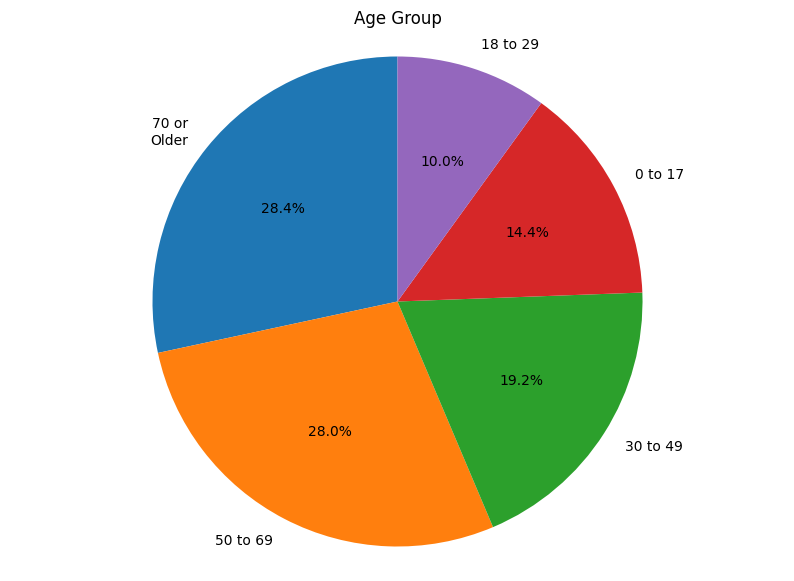

In [8]:
# Checking the ages of people admitted 
pie_maker(df,"Age Group")

- Notice that about 56.4% of the people Discharged where from the age group of 50 or Older
- i am curious of what disease most people in this age groups come to the hospital for

#### From what Areas do people use hospital services most ?

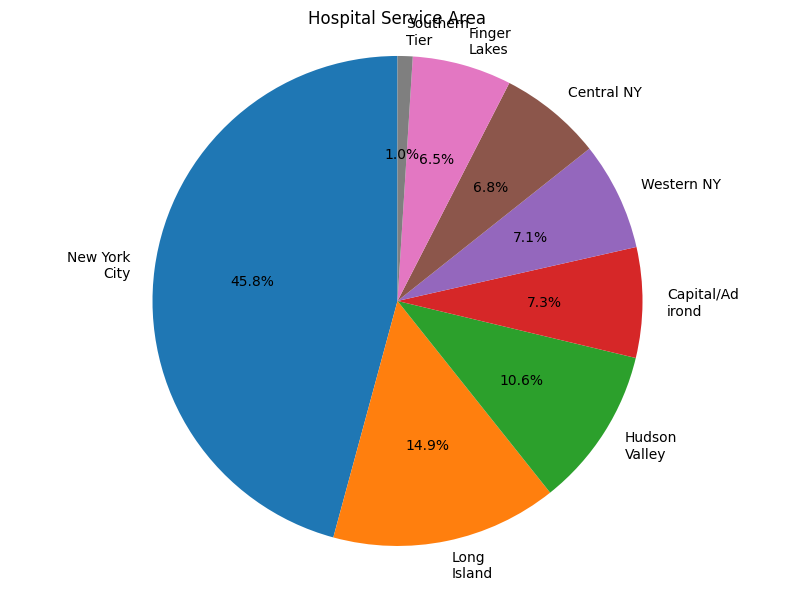

In [9]:
# Checking out the areas where most of the hospital admissions comes from  

pie_maker(df, "Hospital Service Area")

#### How Long do people take in the hospital from time of admission to time of disharge

- check the average legth of stay of some patients who have some diseases 

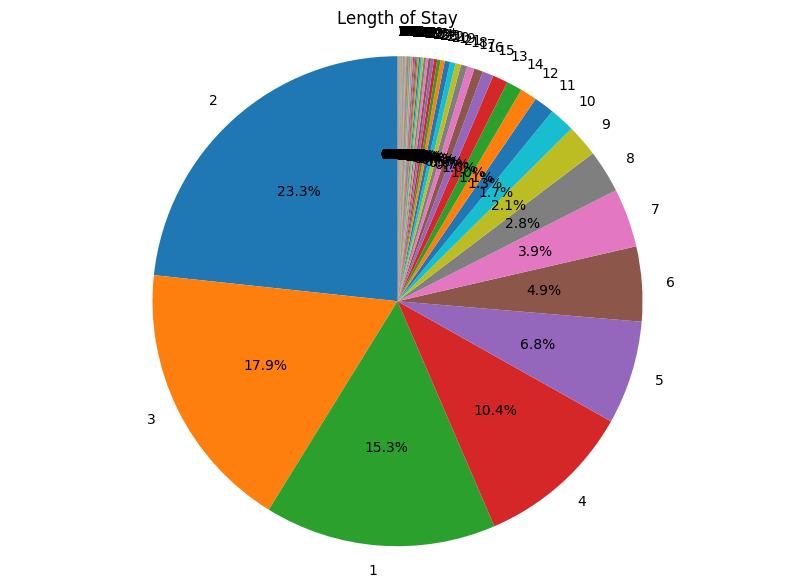

In [10]:

pie_maker(df, "Length of Stay")

- Most people don't want to be in the Hospital for too long the longer the stay the more costly so lets check it out
- From the below bar chart notice that the longest stayed is the Highest average amount paid so we can say that
- *the lenght of stay is directly proportional to the Total Costs : the longer you stay the more you pay*
> Note: there are exceptions to this but it mostly stands 

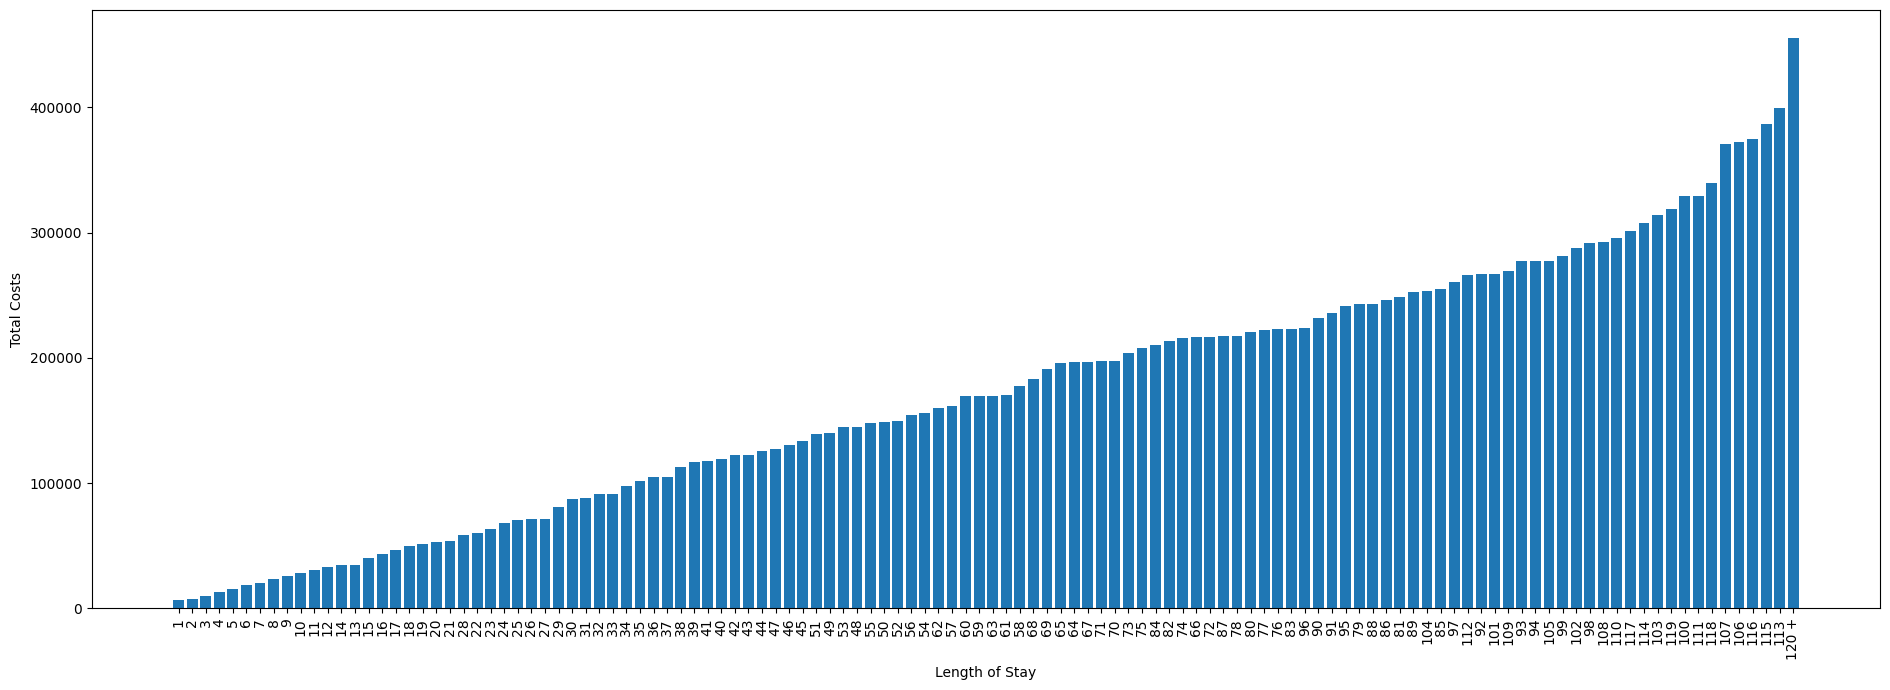

In [11]:
# groups the lenght of stay column with the average total costs and then sorts it in order
len_stay_df = df.groupby("Length of Stay")["Total Costs"].mean().sort_values()

# takes the index column into a series data
index = len_stay_df.index
# takes the values column into a series data 
value = len_stay_df.values


# plots the image
fig = plt.figure(figsize=(19, 7), dpi=100)
# this plots the bar chart 
plt.bar(range(len(value)), value)

plt.xticks(
    ticks=range(len(index)),
    labels=index,
    rotation=90,
    ha = "center"
)

plt.xlabel("Length of Stay")
plt.ylabel("Total Costs")

plt.tight_layout()
plt.show()

#### What are the percentage of the Races that are admitted in the hospital

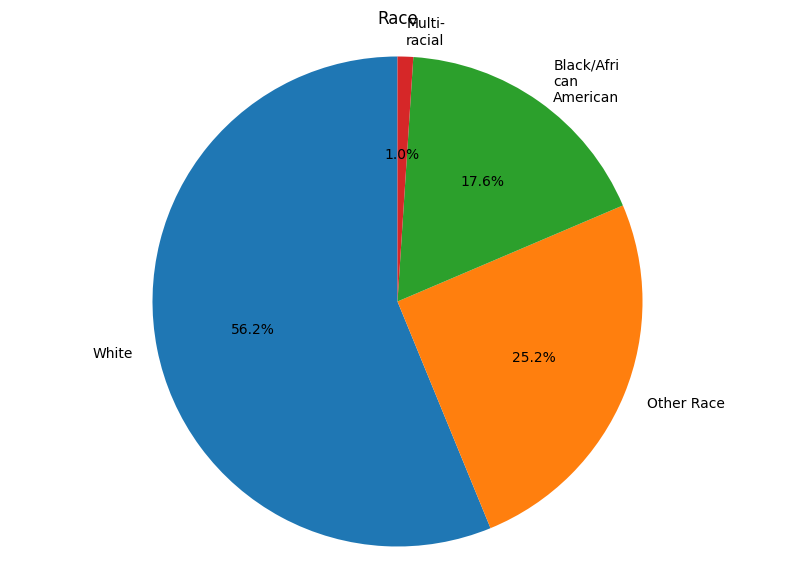

In [12]:
# checking the percentage of Race admitted in the hospitals 

pie_maker(df, "Race")

#### What are the percentage of male and female patients 

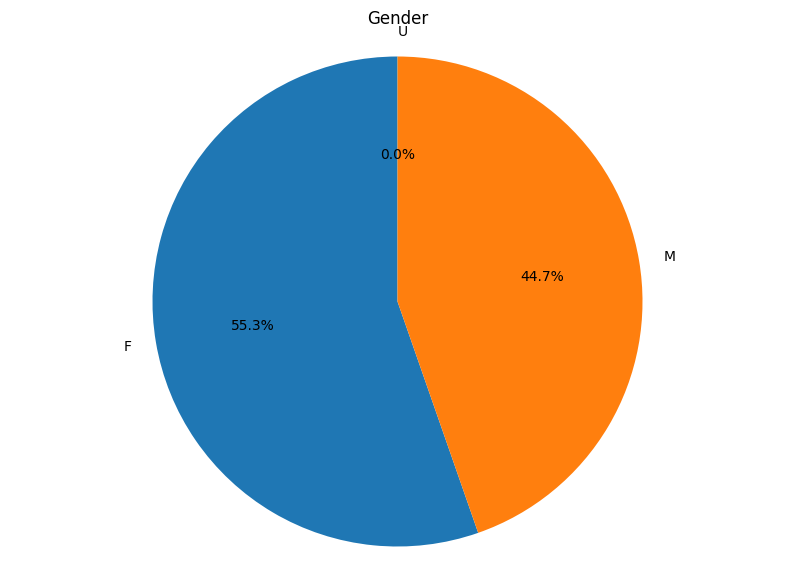

In [13]:
pie_maker(df, "Gender")
# note: U stands for unknown 

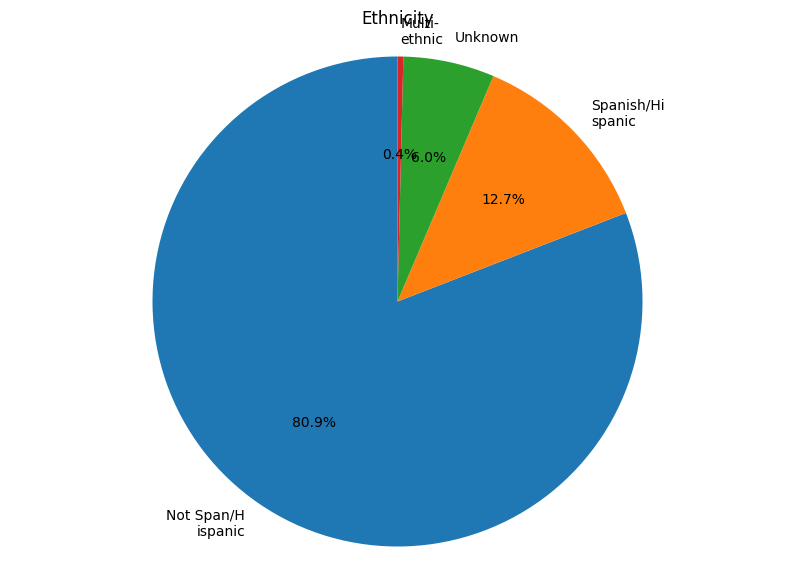

In [14]:
pie_maker(df, "Ethnicity")

- Checking the influence of different columns on the mean total costs

#### How much Abortions was done in the year 2017 

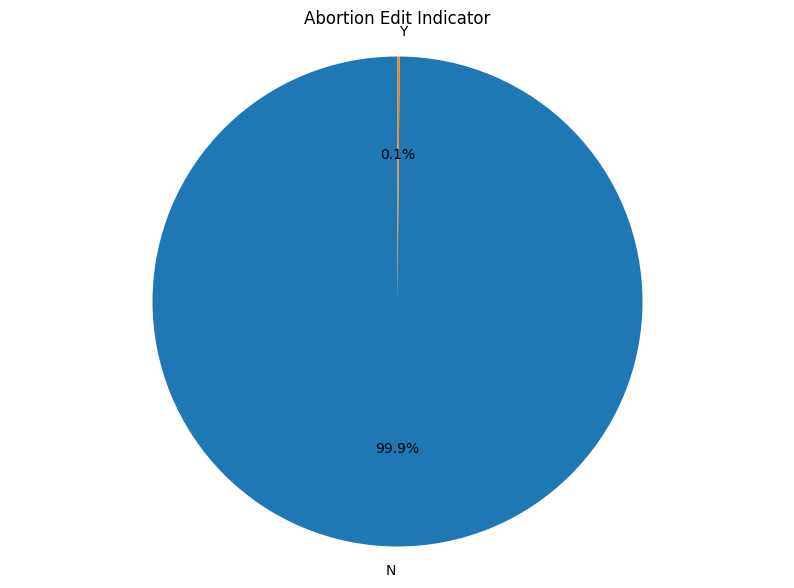

In [15]:
pie_maker(df, "Abortion Edit Indicator")

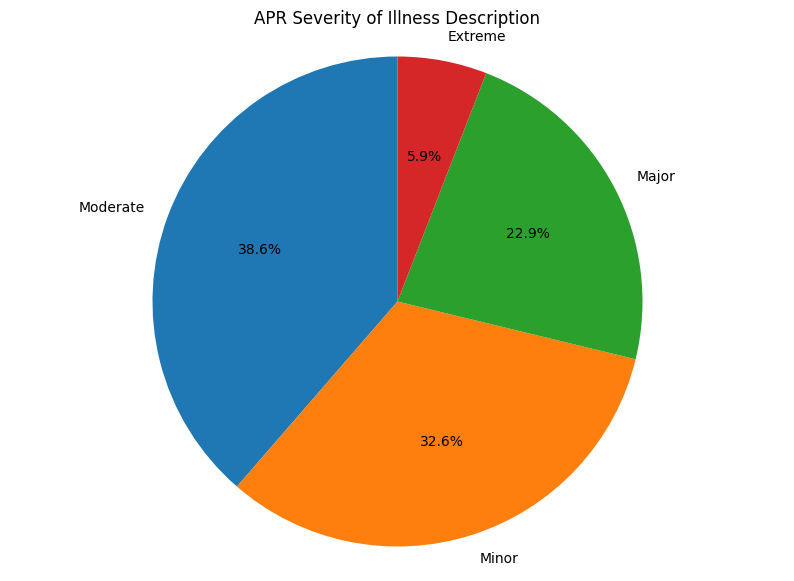

In [16]:
pie_maker(df,"APR Severity of Illness Description")

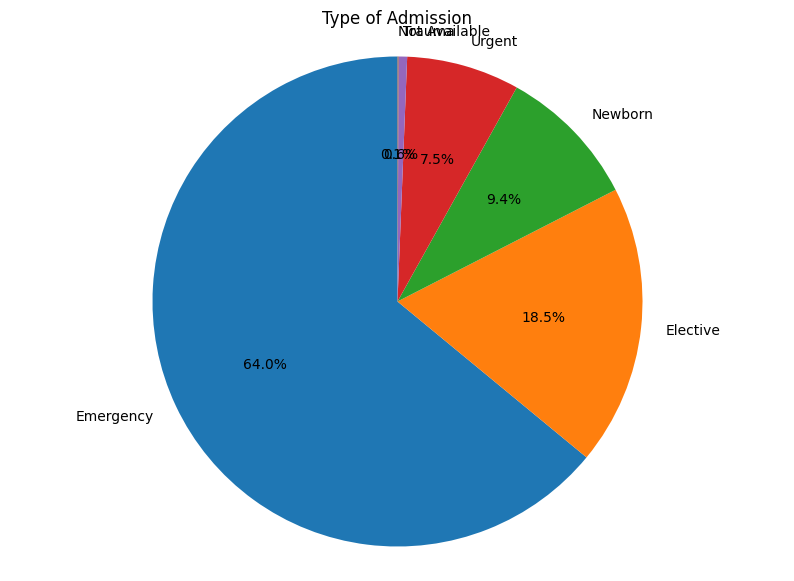

In [17]:
pie_maker(df,"Type of Admission", width = 20)

#### Whats the influence of the disease the patient was admitted for on the total cost paid ?

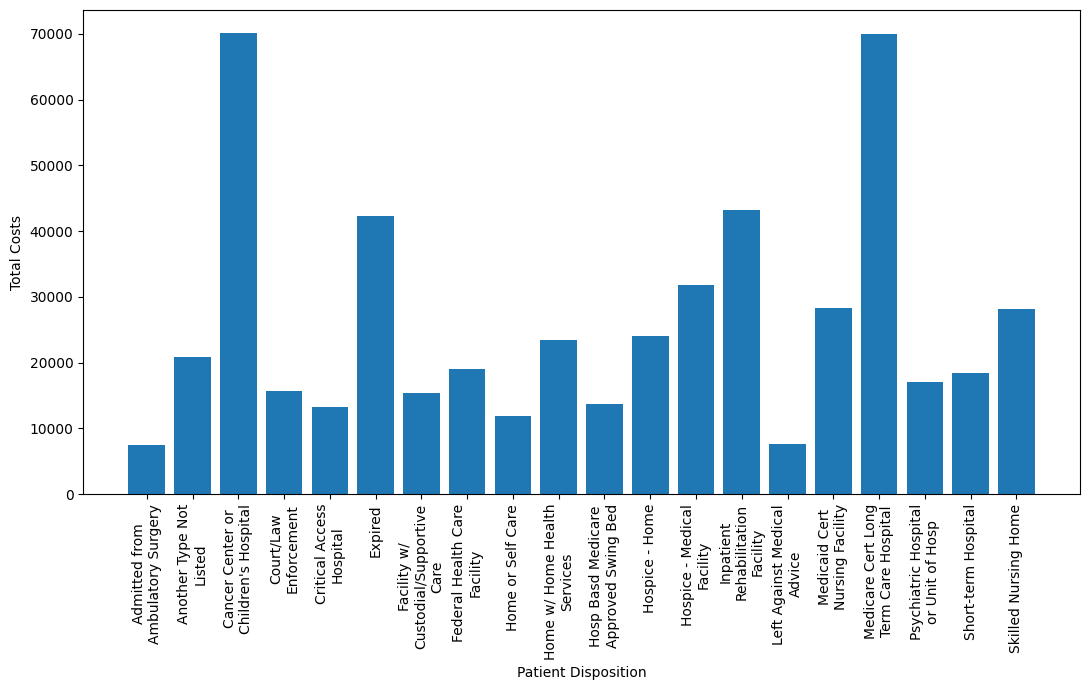

In [18]:
influence_checker('Patient Disposition', 'Total Costs', width = 20)

#### What is the influence of the Gender of the Patient on the Total cost?

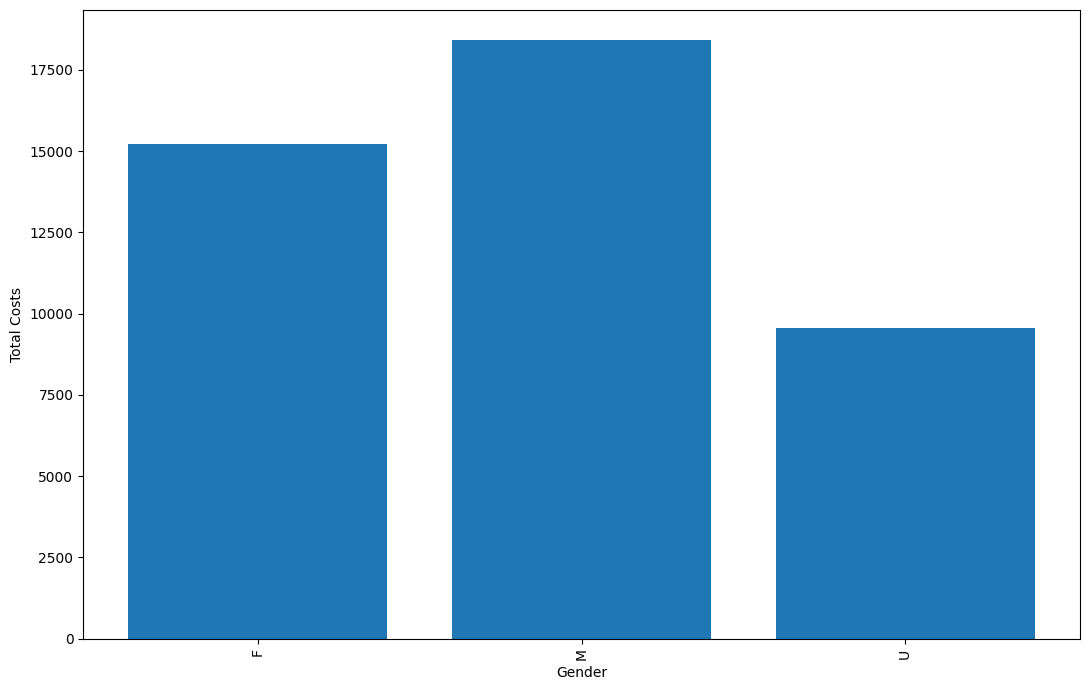

In [19]:
influence_checker("Gender", "Total Costs")

#### What is the influence of the Age Group of the Patient on the Average Total cost?

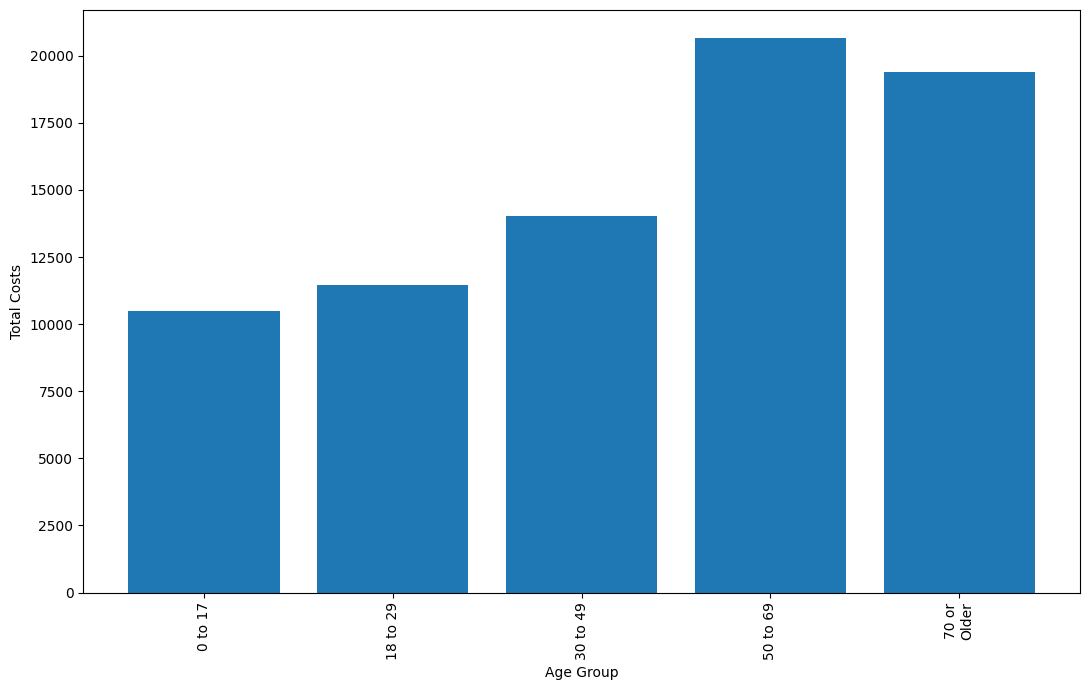

In [20]:
influence_checker("Age Group", "Total Costs")

#### What is the influence of the payment method of the Patient on the Average Total cost?

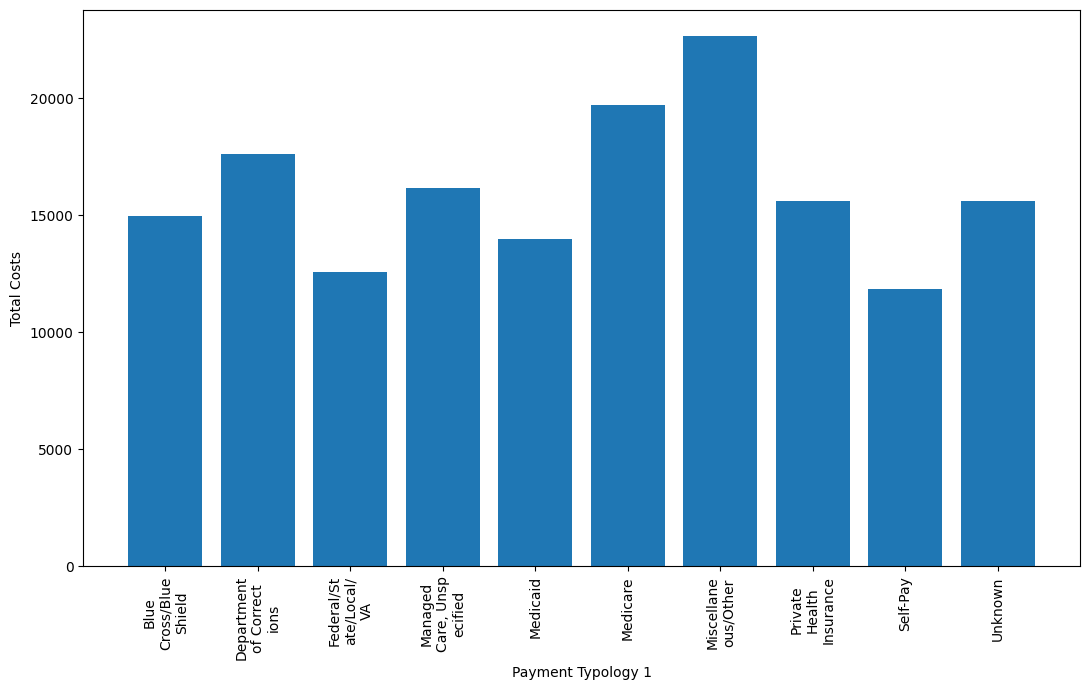

In [21]:
influence_checker ("Payment Typology 1","Total Costs")

#### What is the influence of the Serverity of the Illness of the Patient on the Average Total cost Paid?

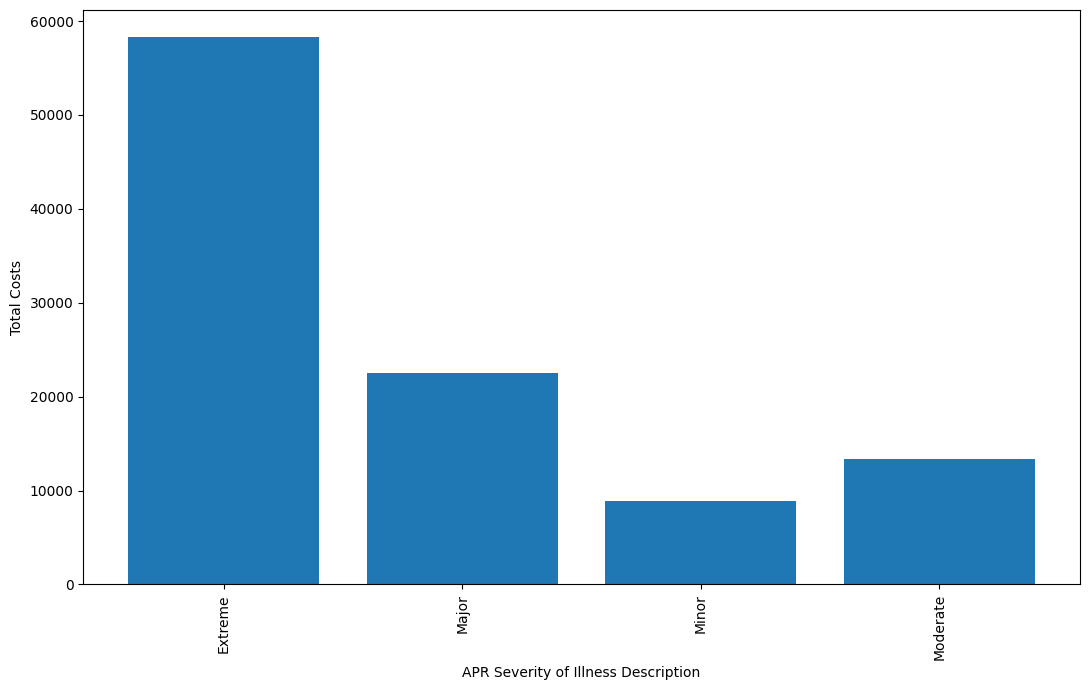

In [22]:
influence_checker("APR Severity of Illness Description","Total Costs")

#### What is the influence of the Method of Admission of the Patient on the Average Total cost Paid?

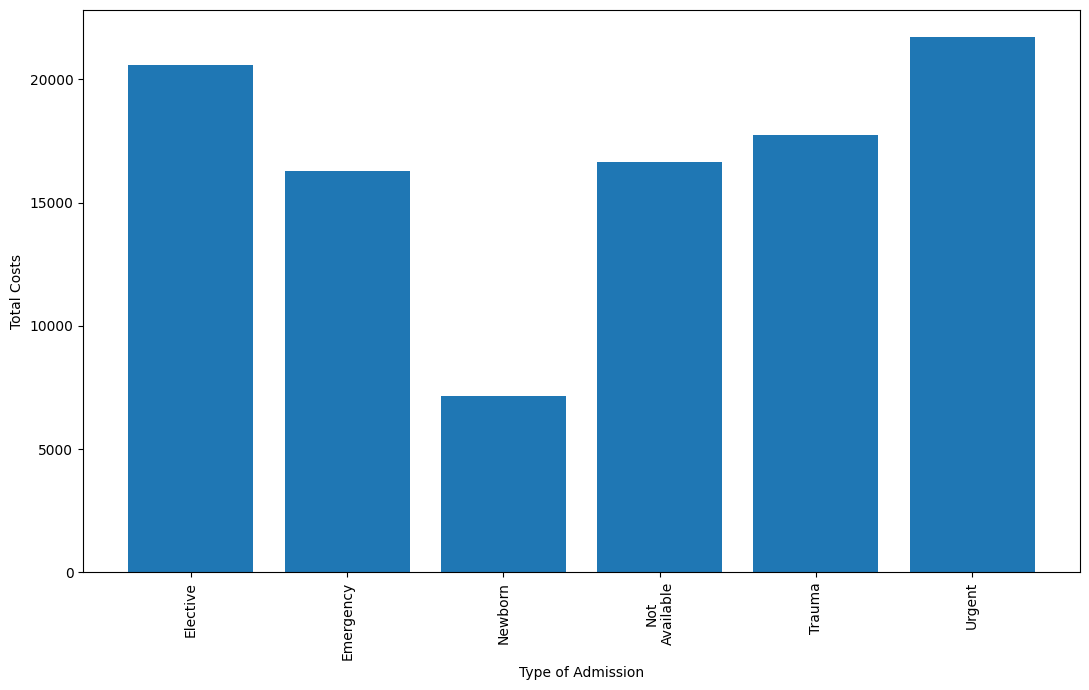

In [23]:
influence_checker("Type of Admission","Total Costs")

#### What is the influence of the Disease Admitted for of the Patient on the Average Total cost Paid?

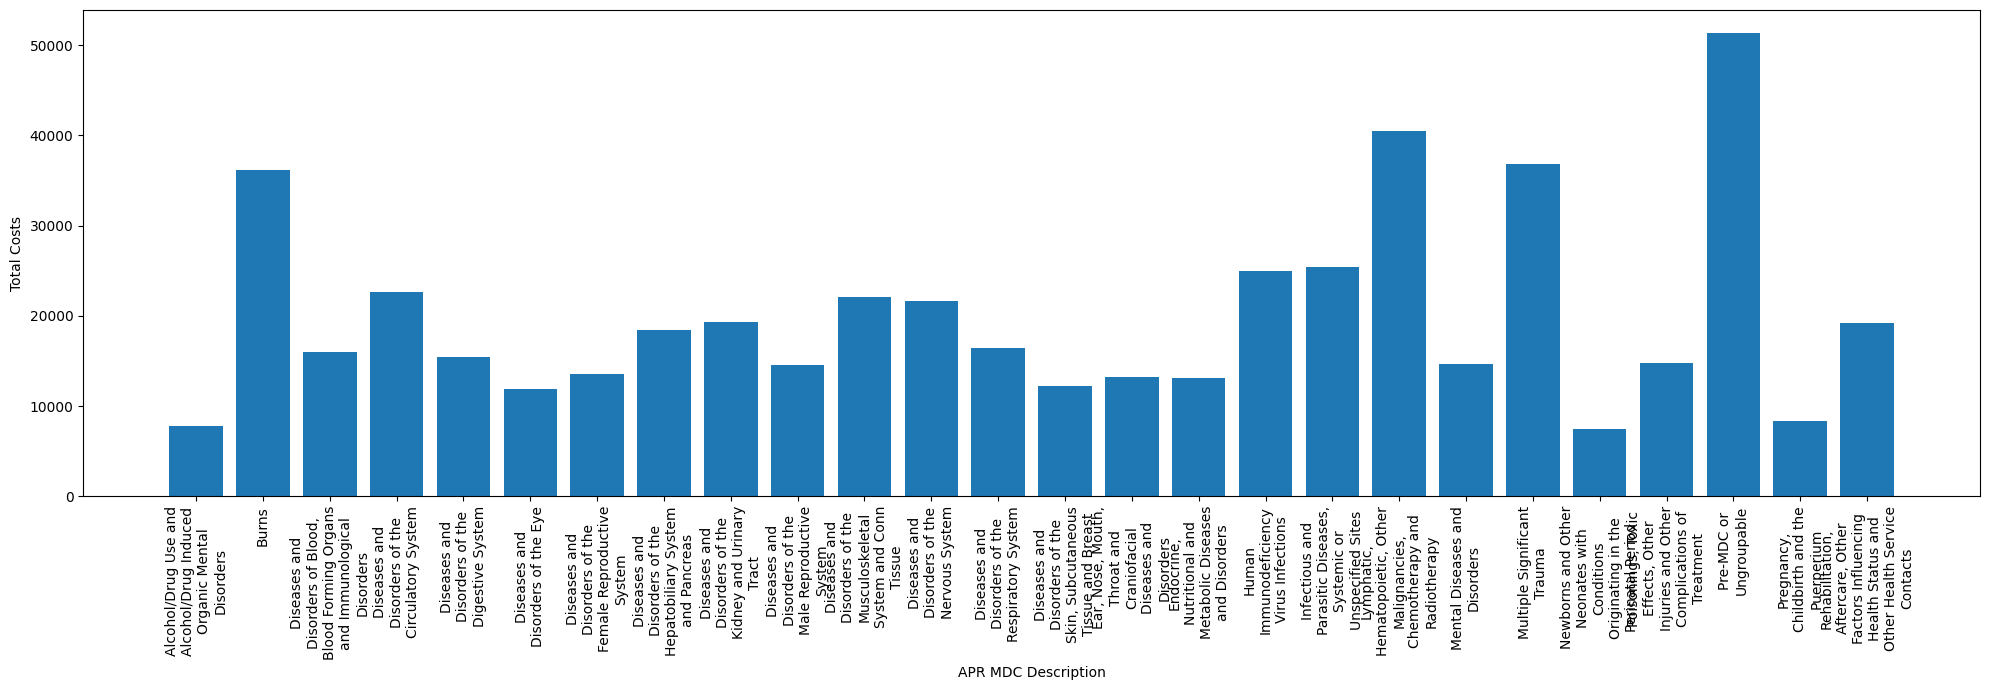

In [24]:
influence_checker("APR MDC Description","Total Costs",figsize_x = 20,width = 20 )

- The Highest cost is the Pre - MDC or ungroupable 

#### **What is Pre-MDC**
Pre-MDC (Major Diagnostic Category)
refers to a special grouping in hospital billing (MS-DRG system) for extremely resource-intensive procedures, like organ transplants or tracheostomies, that bypass standard MDC assignment based on diagnosis, placing them in a distinct category (MDC 00) before the final billing code is determined. It's a crucial step in DRG coding that ensures high-cost cases are recognized, overriding the initial body system (like Circulatory or Respiratory) based on the principal diagnosis to reflect actual care complexity.

#### What are the top 15 on average most costly diseases ?

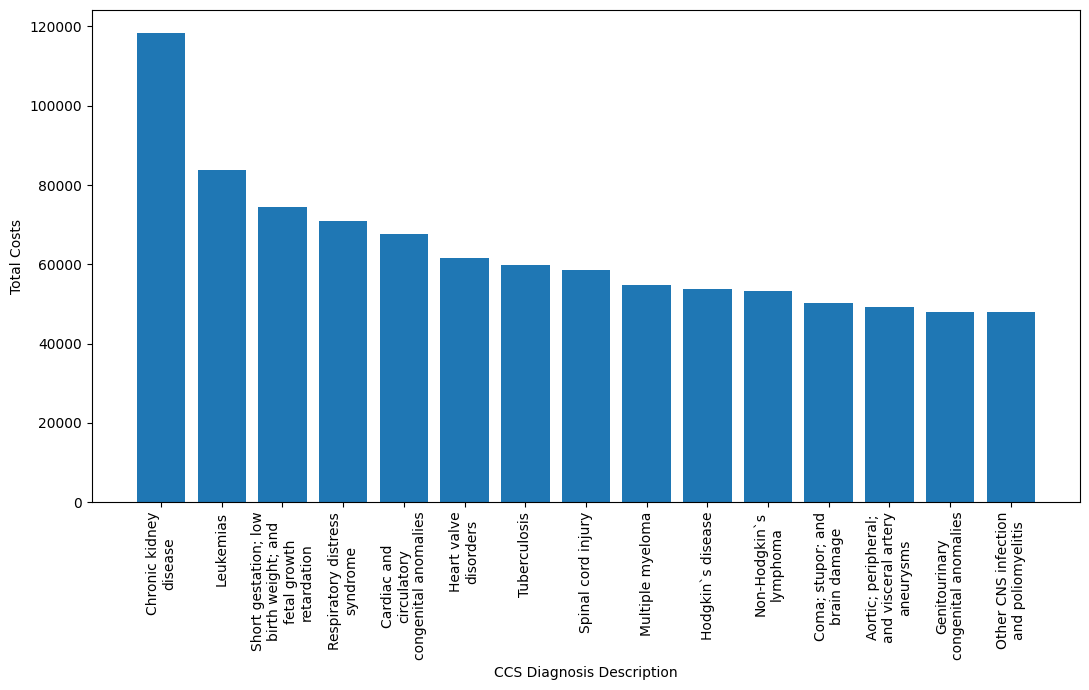

In [25]:
index = df.groupby("CCS Diagnosis Description")["Total Costs"].mean().sort_values(ascending = False).index[0:15]
value = df.groupby("CCS Diagnosis Description")["Total Costs"].mean().sort_values(ascending = False).values[0:15]

sorted_index = sorted(index)


# plot
fig = plt.figure(figsize=(11, 7), dpi=100)

plt.bar(range(len(value)), value)

plt.xticks(
    ticks=range(len(index)),
    labels=fill_text(index, width = 20),
    rotation=90,
    ha = "center"
)

plt.xlabel("CCS Diagnosis Description")
plt.ylabel("Total Costs")

plt.tight_layout()
plt.show()

In [26]:

def unique_count(df, column,y_label):
    """
    this function draws a bar chart of the highest unique values in a column
    """
    
    # Ploting a graph to show The First 15 diseases that those from 70 above to be admitted
    index = df[column].value_counts().index[0:15]
    value = df[column].value_counts().values[0:15]
    
    
    # plotting the data 
    fig = plt.figure(figsize=(11, 9), dpi=100)
    
    plt.bar(range(len(value)), value)

    plt.xticks(
        ticks=range(len(index)),
        labels=fill_text(index, width = 25),
        rotation= 90,
        ha = "center"
    )
    
    plt.xlabel(column)
    plt.ylabel(f"Number of {y_label}")
    
    plt.tight_layout()
    plt.show()


### what is the top 15 diesease that each age group got admitted for ?
- using the Unique function above i can create a function that will graph out the top 15 diseases that caused each age group to be admitted and discharged from the hospital


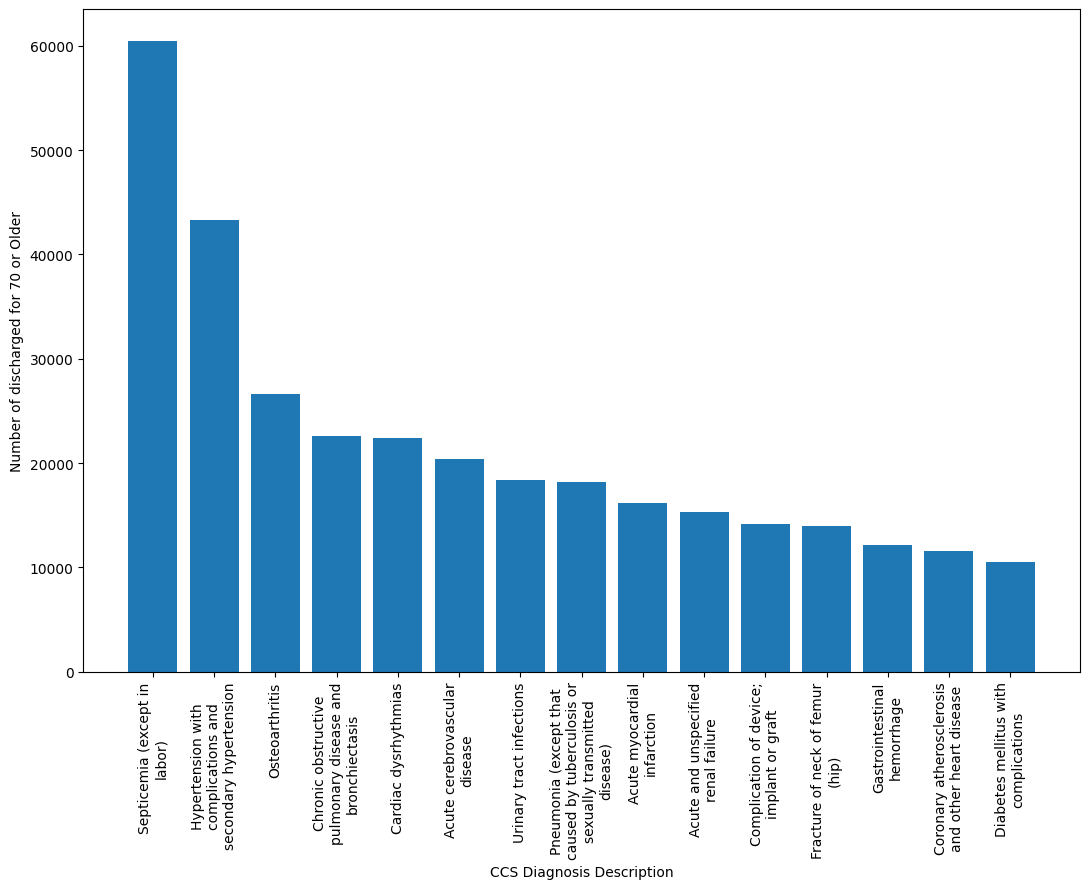

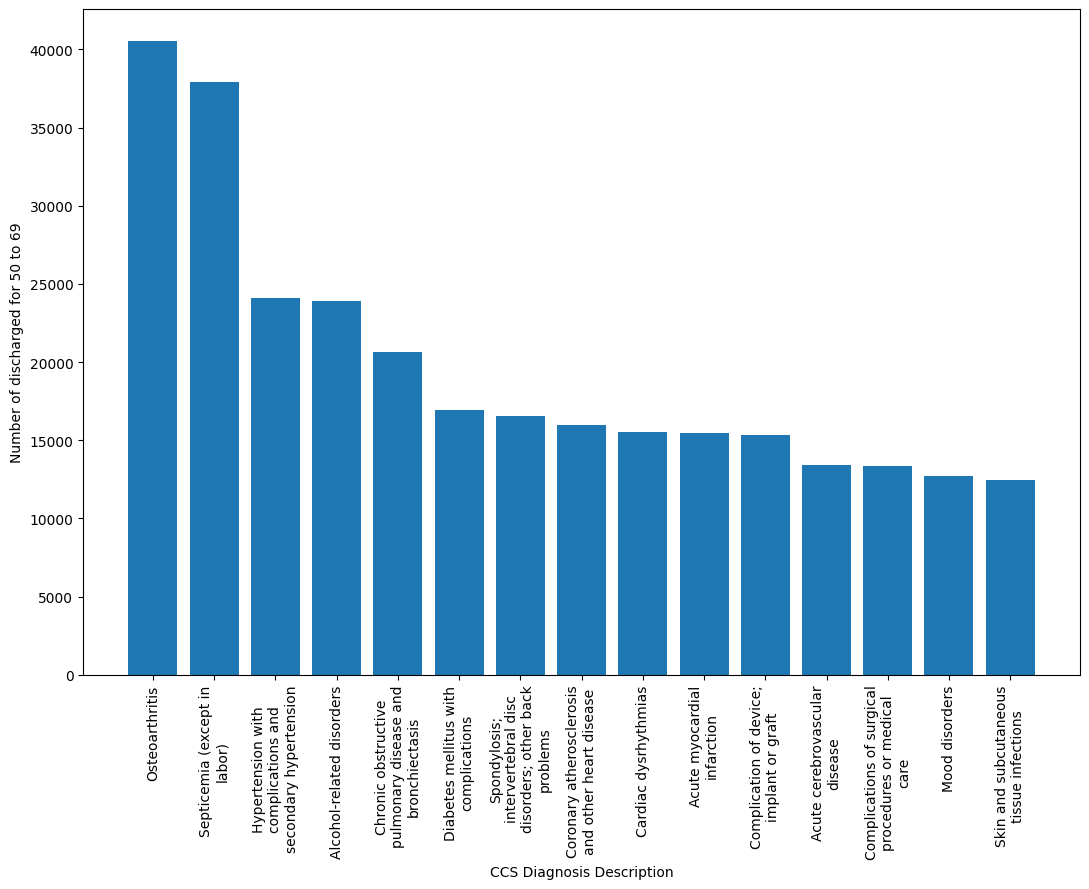

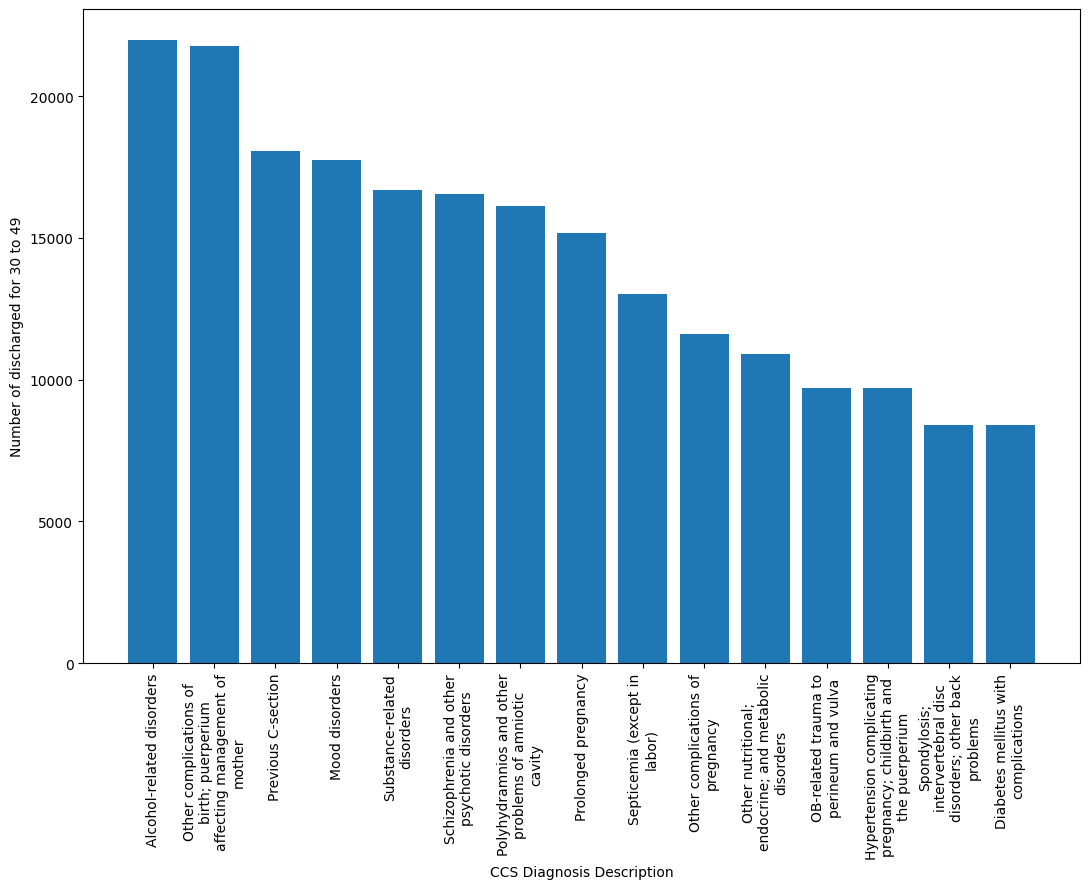

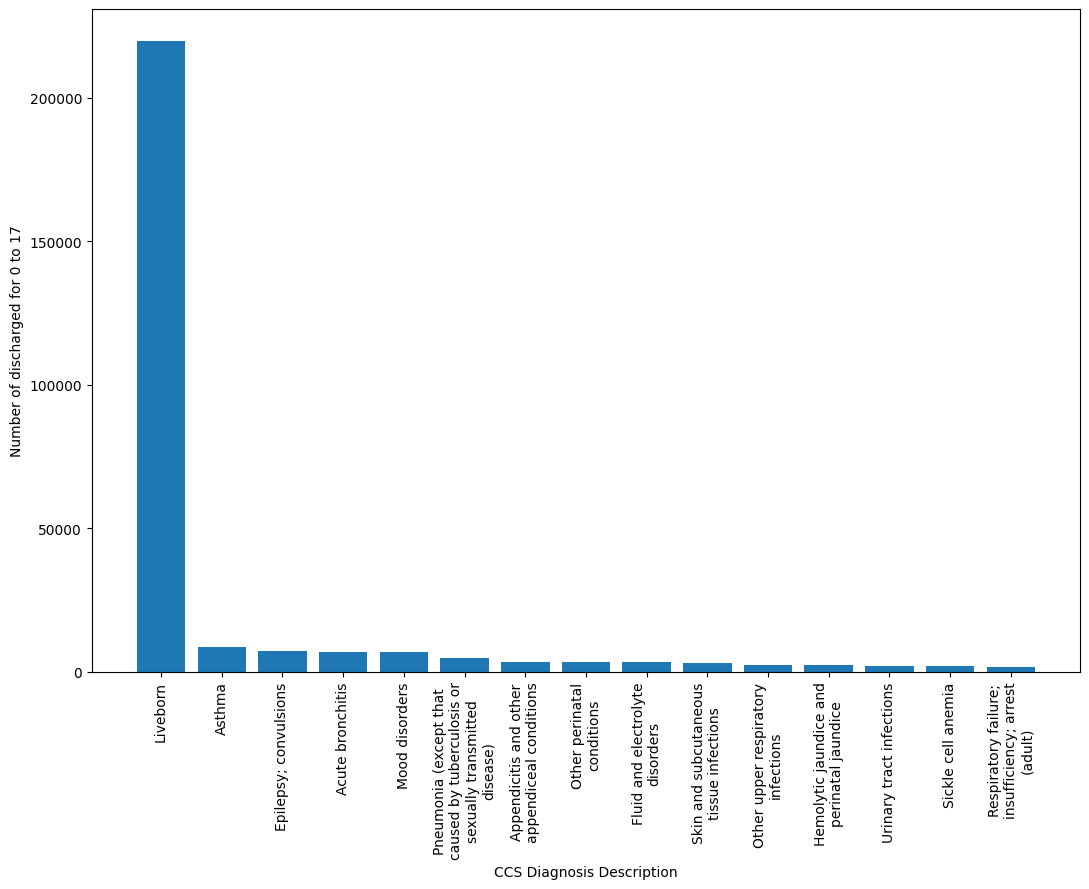

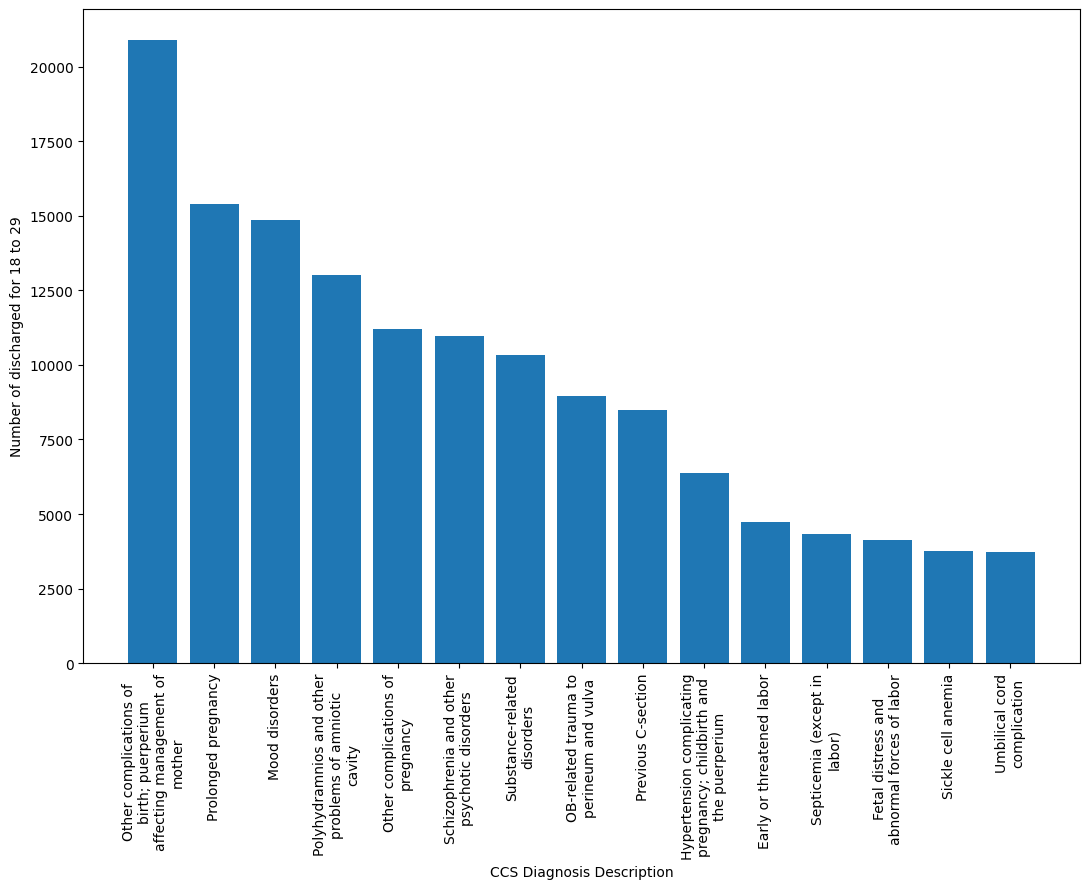

In [27]:


list_age_groups = ['70 or Older', '50 to 69', '30 to 49', '0 to 17', '18 to 29']

def age_disease(df, list_age_group):
    """
    This function uses the unique_count function to plot the graph of 
    top 15 disease that each age group got admitted for.
    """
    for label in list_age_group:
        age_group_df = df[df["Age Group"] == label]
        unique_count(age_group_df, "CCS Diagnosis Description", f"discharged for {label}")

age_disease(df, list_age_groups)

#### What Age groups are Undergoing The Abortion procedure  

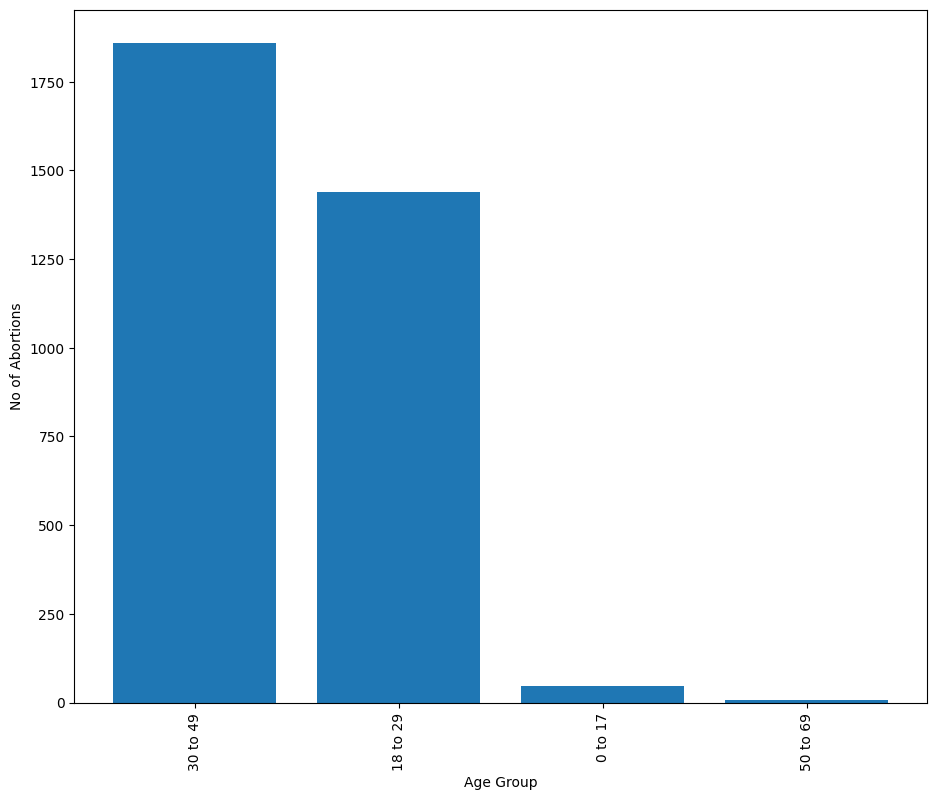

In [28]:
# what are the age group of those people who did abortion
abort = df.groupby("Abortion Edit Indicator")["Age Group"].value_counts()

abortions = abort["Y"]

fig = plt.figure(figsize=(11, 9), dpi=100)
plt.bar(range(len(abortions.values)), abortions.values)

plt.xticks(
    ticks = range(len(abortions.index)),
    labels = abortions.index,
    rotation = 90,
    ha = "center"
)
plt.xlabel("Age Group")

plt.ylabel("No of Abortions")

plt.show()


## **Insights gained 1**

- The disease that most people aged 70 and above are admitted to the hospital for is the septicemia
> Septicemia, or blood poisoning, is a severe bloodstream infection where germs (bacteria, viruses, fungi) enter the blood, causing a dangerous, body-wide reaction that can lead to sepsis, organ failure, and death
    
- The disease that most people aged 50 to 69 are admitted to the hospital for is the Ostheoarthritis
>Osteoarthritis (OA) is the most common type of arthritis, a degenerative joint condition where protective cartilage wears down, causing pain, stiffness, swelling, and reduced movement, most often in hands, hips, knees, and spine, though it's manageable through lifestyle, exercise, weight management, and medication, with no cure for the joint damage itself. It involves cartilage breakdown, bone changes, and inflammation, affecting quality of life but can be slowed by managing symptoms.

- The disease/reason that most people aged 30 to 49 are admitted to the hospital for is the alcohol-related disorders.
>Health risks of alcohol use: Drinking alcohol is associated with risks of developing noncommunicable diseases such as liver diseases, heart diseases, and different types of cancers, as well as mental health and behavioural conditions such as depression, anxiety and alcohol use disorders.

- The disease/reason that most people aged 18 to 29 are admitted to the hospital for is other complications of birth puerperium affecting management of mother.
>The puerperium (postpartum period) can present a range of complications that significantly affect the mother's management and recovery, ranging from common, less severe issues to life-threatening conditions.

- The disease that most children aged 0 to 17 are admitted to the hospital for is the Liveborn.
> Liveborn is the term for a newborn who breaths or shows other signs of life after birth.

#### what are the top 15 disease that people got admitted for ? 

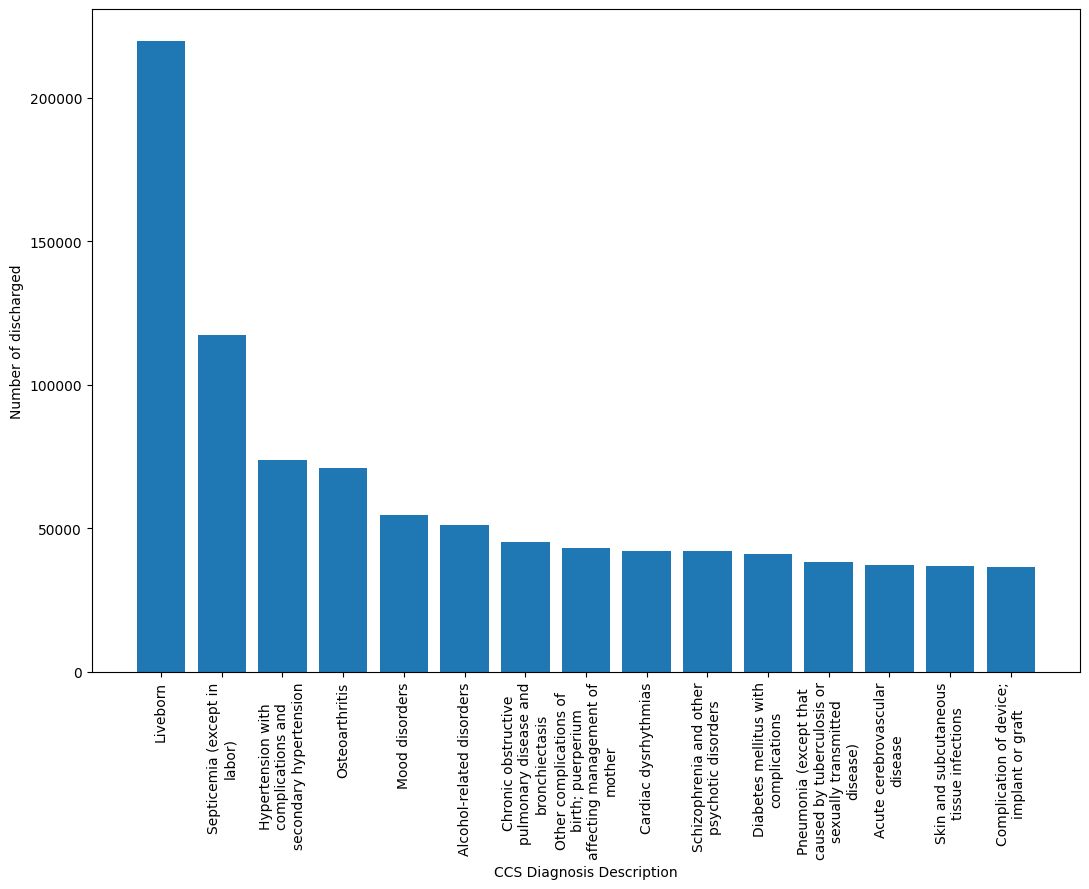

In [29]:
unique_count(df,"CCS Diagnosis Description", "discharged")

## **Insights gained 2**

- Dataset: 2.34m rows × 34 columns from 2017 NY hospitals (SPARCS)

- Data Quality: Minimal missingness except Birth Weight (90.3% - expected for maternity-only field), Payment Typology 3 (70.7%), Payment Typology 2 (34.3%)


- Gender distribution):
Gender: 55.3% F, 44.7% M, 0.0% U
- Age Group distribution:

Age: Skews older - 70+ (143k) and 50-69 (139k) account for 56.4% of discharges

- Top Diagnoses (

Top 15 diagnoses): Liveborn (200k), Septicemia (100k), Hypertension complications (80k),Osteoarthritis (70k)

- Clinical Severity (

Severity of illness): 38.6% Moderate, 32.6% Minor, 22.9% Major, 5.9% Extreme

- Admission Patterns (

Admission patterns): 64% Emergency, 18.5% Elective, 9.4% Newborn; 58% arrived via ED


- Payment types):

Charges: Median $27k, Mean $49k (right-skewed)
Costs: Median $9k, Mean $17k
Payers: Medicare (39%), Medicaid (30%), Private (14%), Blue Cross (11%)
